# Исследование объявлений о продаже квартир

Используя данные сервиса Яндекс.Недвижимость, нам необходимо определить рыночную стоимость объектов недвижимости и типичные параметры квартир

# Подготовительные действия

In [1]:
# импортируем необходимые библиотеки
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# отключим предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore") 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию." data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-столбце-is_apartment" data-toc-modified-id="Пропуски-в-столбце-is_apartment-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Пропуски в столбце <code>is_apartment</code></a></span></li><li><span><a href="#Пропуски-в-столбце-locality_name" data-toc-modified-id="Пропуски-в-столбце-locality_name-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Пропуски в столбце <code>locality_name</code></a></span></li><li><span><a href="#Пропуски-в-столбце-rooms" data-toc-modified-id="Пропуски-в-столбце-rooms-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Пропуски в столбце <code>rooms</code></a></span></li><li><span><a href="#Пропуски-в-столбце-ceiling_height" data-toc-modified-id="Пропуски-в-столбце-ceiling_height-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Пропуски в столбце <code>ceiling_height</code></a></span></li><li><span><a href="#Пропуски-в-столбце-floors_total" data-toc-modified-id="Пропуски-в-столбце-floors_total-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Пропуски в столбце <code>floors_total</code></a></span></li><li><span><a href="#Пропуски-в-столбце-living_area" data-toc-modified-id="Пропуски-в-столбце-living_area-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Пропуски в столбце <code>living_area</code></a></span></li><li><span><a href="#Пропуски-в-столбце-kitchen_area" data-toc-modified-id="Пропуски-в-столбце-kitchen_area-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>Пропуски в столбце <code>kitchen_area</code></a></span></li><li><span><a href="#Пропуски-в-столбце-balcony" data-toc-modified-id="Пропуски-в-столбце-balcony-2.1.8"><span class="toc-item-num">2.1.8&nbsp;&nbsp;</span>Пропуски в столбце <code>balcony</code></a></span></li><li><span><a href="#Пропуски-в-столбцах-airports_nearest,-cityCenters_nearest,-parks_around3000,-parks_nearest,-ponds_around3000,-ponds_nearest" data-toc-modified-id="Пропуски-в-столбцах-airports_nearest,-cityCenters_nearest,-parks_around3000,-parks_nearest,-ponds_around3000,-ponds_nearest-2.1.9"><span class="toc-item-num">2.1.9&nbsp;&nbsp;</span>Пропуски в столбцах <code>airports_nearest</code>, <code>cityCenters_nearest</code>, <code>parks_around3000</code>, <code>parks_nearest</code>, <code>ponds_around3000</code>, <code>ponds_nearest</code></a></span></li><li><span><a href="#Пропуски-в-столбце-days_exposition" data-toc-modified-id="Пропуски-в-столбце-days_exposition-2.1.10"><span class="toc-item-num">2.1.10&nbsp;&nbsp;</span>Пропуски в столбце <code>days_exposition</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1.11"><span class="toc-item-num">2.1.11&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Вывод-по-разделу-&quot;Предобработка-данных&quot;" data-toc-modified-id="Вывод-по-разделу-&quot;Предобработка-данных&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод по разделу "Предобработка данных"</a></span></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных-и-выполните-инструкции:" data-toc-modified-id="Проведите-исследовательский-анализ-данных-и-выполните-инструкции:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных и выполните инструкции:</a></span><ul class="toc-item"><li><span><a href="#Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучите следующие параметры: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?" data-toc-modified-id="Изучите-время-продажи-квартиры.-Постройте-гистограмму.-Посчитайте-среднее-и-медиану.-Опишите,-сколько-обычно-занимает-продажа.-Когда-можно-считать,-что-продажи-прошли-очень-быстро,-а-когда-необычно-долго?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?</a></span></li><li><span><a href="#Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили" data-toc-modified-id="Уберите-редкие-и-выбивающиеся-значения.-Опишите,-какие-особенности-обнаружили-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-Изучите,-зависит-ли-цена-от-площади,-числа-комнат,-удалённости-от-центра.-Изучите-зависимость-цены-от-того,-на-каком-этаже-расположена-квартира:-первом,-последнем-или-другом.-Также-изучите-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-среди-них-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-'locality_name'" data-toc-modified-id="Выберите-10-населённых-пунктов-с-наибольшим-числом-объявлений.-Посчитайте-среднюю-цену-квадратного-метра-в-этих-населённых-пунктах.-Выделите-среди-них-населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья.-Эти-данные-можно-найти-по-имени-в-столбце-'locality_name'-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'</a></span></li><li><span><a href="#Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-('locality_name').-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона" data-toc-modified-id="Изучите-предложения-квартир:-для-каждой-квартиры-есть-информация-о-расстоянии-до-центра.-Выделите-квартиры-в-Санкт-Петербурге-('locality_name').-Ваша-задача-—-выяснить,-какая-область-входит-в-центр.-Создайте-столбец-с-расстоянием-до-центра-в-километрах:-округлите-до-целых-значений.-После-этого-посчитайте-среднюю-цену-для-каждого-километра.-Постройте-график:-он-должен-показывать,-как-цена-зависит-от-удалённости-от-центра.-Определите-границу,-где-график-сильно-меняется-—-это-и-будет-центральная-зона-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона</a></span></li><li><span><a href="#Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?" data-toc-modified-id="Выделите-сегмент-квартир-в-центре.-Проанализируйте-эту-территорию-и-изучите-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков.-Также-выделите-факторы,-которые-влияют-на-стоимость-квартиры-(число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления).-Сделайте-выводы.-Отличаются-ли-они-от-общих-выводов-по-всему-городу?-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Откроем файл с данными и изучим общую информацию.

In [3]:
# читаем данные
data = pd.read_csv('datasets/real_estate_data.csv')

# выводим информацию о датасете и первые записи
data.info()
display(
    data.head()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Мы видим, что данные слились из-за того, что разделитель отличен от `,`. Их необходимо перечитать с учётом разделителя `\t`.

In [5]:
# читаем данные заново с новым разделителем
data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

# выводим информацию о датасете и первые записи
data.info()
display(
    data.head()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод**

- В наборе данных 18 количественных и 4 качественных категории;
- в 14 из 22 столбцов содержатся пропуски данных;
- в 12 из 22 столбцов данные имеют не совсем подходящий тип данных: 
 - столбец `is_apartment` имеет тип `object` вместо `bool`; скорее всего это из-за наличия пропусков, мы проверим позже;
 - столбцы `last_price`, `floors_total`, `balcony`, `airp_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` имеют избыточный в контексте содержащихся в них данных тип `float64` и должны быть приведены к типу `int64`;
 - столбец `first_day_expo` имеет тип `object` всместо `datetime64`.

## Предобработка данных

### Обработка пропусков

Для начала изучим каждый столбец более тщательно и узнаем о них следующее:

1. Список уникальных значений (для качественных категорий)
2. Применим метод `describe()` (для количественных категорий)

In [4]:
# запишем качественные категории в отдельный список, т.к. их намного меньше 
qualitative_cats = ['is_apartment', 'studio', 'open_plan', 'locality_name']

# изучим их
print('Изучаем качественные категории')
for i in qualitative_cats:
    display(data[i].value_counts())

# изучим количественные категории с числовыми данными в стобцах
display(data.describe().T)

# изучим дату первого размещения (количественная категория, но с нечисловыми данными)
display(data['first_day_exposition'].describe())

Изучаем качественные категории


False    2725
True       50
Name: is_apartment, dtype: int64

False    23550
True       149
Name: studio, dtype: int64

False    23632
True        67
Name: open_plan, dtype: int64

Санкт-Петербург                               15721
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
деревня Раздолье                                  1
поселок Гладкое                                   1
посёлок при железнодорожной станции Вещево        1
поселок Коммунары                                 1
деревня Ялгино                                    1
Name: locality_name, Length: 364, dtype: int64

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

Итак, что нам удалось узнать:

1. Качественные категории
 - `is_apartment`: уникальные значения столбца соответствуют булеву типу, проблем с преобразованием типа быть не должно. Большой процент пропусков - 88,3% значений пропущено.
 - `studio`: всё в порядке
 - `open_plan`: всё в порядке
 - `locality_name`: имеется незначительный процент пропусков - 0,2%. Присутствует доминирующее значение - `Санкт-Петербург` - более 60% от всей выборки
2. Количественные категории
 - `total_images`: минимиальное значение равно 0, т.е. имеются объявления без изображений. Довольно странно для продажи недвижимости, остальное в порядке
 - `last_price`: минимальное значение составляет 12190. Это значение резко выбивается из всей выборки. Однозначно, это результат ошибки - то ли к нам в данные попало объявление об аренде, то ли цена указана в отличной от рублей валюте, то ли это стоимость в тысячах рублей.
 - `total_area`: в целом выглядит неплохо. Комнаты по 12 м<sup>2</sup> тоже продаются, это нормально.
 - `first_day_exposition`: несмотря на то, что категория количественная, тип данных у неё пока неверный, поэтому посмотреть не получилось. Но пропусков нет, поэтому посмотрим на неё потом, когда будем преобразовывать типы.
 - `rooms`: 19 комнат звучит пугающе, но с учётом максимальной площади в 900 м<sup>2</sup>, выглядит вполне правдоподобно. А вот 0 комнат быть не может, это точно. В контексте задачи записи с 0 комнат можно рассматривать как пропуски и попытаться обработать.
 - `ceiling_height`: потолки высотой 1 и 100 метров явно не из этой галактики. Пропуски данных присутствуют, около 40% от всех данных.
 - `floors_total`: если верить Википедии, зданий в 60 этажей в Санкт-Петербурге и области нет, как и жилых помещений в Лахта-центре (88 этажей). Так что это, скорее всего, опечатка. Имеются незначительные пропуски данных - 0,4%.
 - `living_area`: 2 метра жилой площади - это явная ошибка. В столбце присутствуют пропуски данных - 8%.
 - `floor`: значения в норме, квартира на 33-м этаже вполне может присутствовать, если это ЖК "Князь Александр Невский" (37 этажей). Пропусков нет.
 - `kitchen_area`: кухни 1,3 и 112 м<sup>2</sup> это явные аномалии. Присутствуют пропуски данных - 9,6%
 - `balcony`: почти половина данных это пропуски - 48,6%.
 - `airports_nearest`: судя по данным, есть квартиры, расположенные непосредственно на территории аэропортов - это явные аномалии. В столбце 23,4% пропусков.
 - `cityCenters_nearest`: 23,3% пропусков, по значения вопросов пока нет.
 - `parks_around3000`: от 0 до 3 парков в радиусе 3 км, вполне правдоподобно. В столбце 23,3% пропусков
 - `parks_nearest`: от 1 до 612 м до ближайшего парка это вполне правдоподобно. В столбце 65,9% пропусков
 - `ponds_around3000`: от 0 до 3 водоёмов в радиусе 3 км, вполне правдоподобно. В столбце 23,3% пропусков
 - `ponds_nearest`: от 13 до 729 м до ближайшего водоёма это вполне правдоподобно. В столбце 61,6% пропусков
 - `days_exposition`: самому свежему объявлению - 1 день, самому старому - 232. Не всем везёт продать квартиру быстро, но так бывает. В столбце 13,4% пропусков.
 
После изучения столбцов начнём заполнять пропуски.

#### Пропуски в столбце `is_apartment`

Столбец `is_apartment` содержит информацию булева типа - ответ Да или Нет на вопрос, является ли данная недвижимость апартаментами. Логично предположить, что там, где есть пропуски ответ отрицательный. Заполним пропуски данных логическим значением `False`.

In [5]:
# заполняем пропуски

data = data.fillna(value = {'is_apartment' : False})

# проверяем

display(data['is_apartment'].value_counts())
display(data.info())

False    23649
True        50
Name: is_apartment, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

None

Пропуски заполнены. После заполнения столбец поменял свой тип на `bool`. Это говорит нам о том, что все имевшиеся в нём значения также были типа `bool`, но из-за наличия пропусков столбец имел тип `object`. Дополнительное изменение типа не понадобится.

Причина появления таких пропусков - скорее всего техническая. Вероятнее всего, данные потерялись при экспорте.

#### Пропуски в столбце `locality_name`

Столбец `locality_name` содержит информацию о населённом пункте, в котором расположена продаваемая квартира. Как правило, на всех ресурсах, где требуется ввести населённый пункт, имеется значение по умолчанию для этого поля, на случай, если выбор не сделан. Так что нам логично обработать пропуски в данном столбце заполнением значением по умолчанию. В нашем случае это будет Санкт-Петербург.

In [6]:
# заполняем пропуски

data = data.fillna(value = {'locality_name' : 'Санкт-Петербург'})

# проверяем

display(data['locality_name'].value_counts())
display(data.info())

Санкт-Петербург                               15770
посёлок Мурино                                  522
посёлок Шушары                                  440
Всеволожск                                      398
Пушкин                                          369
                                              ...  
деревня Раздолье                                  1
поселок Гладкое                                   1
посёлок при железнодорожной станции Вещево        1
поселок Коммунары                                 1
деревня Ялгино                                    1
Name: locality_name, Length: 364, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

None

#### Пропуски в столбце `rooms`

Столбец `rooms` содержит информацию о количестве комнат. Так как 0 комнат в квартире быть не может, это значение в контексте задачи мы приравниваем к пропуску. Для выбора метода обработки таких записей, сначала нужно посмотреть на них.

In [7]:
# выведем все записи, для которых число комнат равно 0 и отсортируем их по общей площади

display(data.query('rooms == 0').sort_values(by='total_area', ascending = False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,False,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20082,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.10,5.0,60.5,2,False,...,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
3458,6,7400000.0,73.6,2017-05-18T00:00:00,0,NaN,3.0,50.0,1,False,...,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,False,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
13613,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.30,7.0,33.0,6,False,...,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1350000.0,18.8,2017-11-22T00:00:00,0,2.75,19.0,15.8,1,False,...,NaN,NaN,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0
12996,8,1900000.0,18.0,2019-01-25T00:00:00,0,2.60,5.0,16.0,3,False,...,NaN,NaN,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0
716,5,1500000.0,17.0,2017-06-07T00:00:00,0,2.70,9.0,12.0,1,False,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
9412,5,2100000.0,16.0,2017-12-10T00:00:00,0,NaN,6.0,13.0,1,False,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


Легче не стало. Квартиры, для которых число комнат указано как нулевое, имеют большой разброс по значению общей площади. Количество комнат - это очень важный показатель и просто оставить эти нули мы не можем. Но у нас есть столбец `studio`, который может нам помочь - в квартире-студии количество комнат в принципе равно 1, вне зависимости от площади. Поэтому для всех записей с количеством комнат, равным 0 и значением столбца `studio` равным `True` можно заменить 0 на 1.

In [8]:
# заменяем значения
data.loc[(data['rooms'] == 0) & (data['studio'] == True), 'rooms'] = 1

# посмотрим на оставшшиеся записи с нулевым количеством квартир
display(data.query('rooms == 0').sort_values(by='total_area', ascending = False))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19392,5,71000000.0,371.00,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,False,...,NaN,NaN,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
7237,8,2999000.0,42.63,2017-11-27T00:00:00,0,NaN,16.0,25.7,2,False,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4683,2,3650000.0,35.00,2018-02-01T00:00:00,0,NaN,25.0,23.4,25,False,...,NaN,NaN,Санкт-Петербург,43431.0,12188.0,0.0,NaN,0.0,NaN,100.0
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.3,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
21628,9,3900000.0,34.00,2017-03-18T00:00:00,0,NaN,20.0,24.0,10,False,...,NaN,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
7008,4,5200000.0,32.30,2017-09-14T00:00:00,0,NaN,11.0,25.5,4,False,...,NaN,NaN,Санкт-Петербург,30824.0,6469.0,1.0,756.0,1.0,936.0,86.0
17805,17,2600000.0,31.10,2017-10-25T00:00:00,0,NaN,16.0,21.4,14,False,...,NaN,2.0,Санкт-Петербург,19212.0,22637.0,0.0,NaN,1.0,457.0,44.0
6805,7,1850000.0,31.00,2017-11-10T00:00:00,0,NaN,18.0,18.0,10,False,...,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,7.0
19735,1,2800000.0,30.50,2017-10-10T00:00:00,0,2.75,25.0,20.0,2,False,...,NaN,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,13.0


Осталось 59 записей с нулевым количеством комнат. Из них 58 - с общей площадью менее 43 м<sup>2</sup>. Это явно свидетельствует о том, что перед нами 58 однокомнатных квартир, т.е. для этих записей мы также можем смело заменить нулевое количество единицей. По оставшейся квартире площадью 371 м<sup>2</sup> сделать какой-либо правдоподобный прогноз о количестве комнат мы не можем, но и оставить квартиру без комнат также не имеем права. Поэтому также запишем туда единицу, чтобы у нас была хотя бы одна комната.

Информацию обо всех квартирах с нулевым количеством комнат мы обязательно передадим коллегам, которые готовили для нас данные. Эти сведения были либо потеряны в результате экспорта данных, либо в результате неверного оформления формы для подачи объявления - количество комнат не указано как обязательное для заполнения поле (или отсутствует проверка на нулевое значение при подаче объявления), отсюда и пропуски. В любом случае причина наличия этих пропусков - техническая. Заполним оставшиеся значения единицей и перейдём к следующему столбцу с пропусками:

In [9]:
# заполняем оставшиеся значения единицей

data.loc[data['rooms'] == 0, 'rooms'] = 1

# проводим проверку

display(data['rooms'].describe())

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

#### Пропуски в столбце `ceiling_height`

Столбец `ceiling_height` содержит высоту потолков. Пропуски в данном столбце логичнее всего заполнить медианным значением.

In [10]:
# заполняем пропуски
data = data.fillna(value = {'ceiling_height' : data['ceiling_height'].median()})

# проверяем
display(data['ceiling_height'].describe())

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

#### Пропуски в столбце `floors_total`

Столбец `floors_total` содержит общую этажность дома. Заполнять пропуски в данном столбце будем следующим образом - сгруппируем данные по населённому пункту (столбец `locality_name`) и найдём для каждого населённого пункта самое распространённое значение этажности, а также типовые значения этажности для данного населённого пункта. Для этого мы напишем функцию, которая будет выполнять следующие действия:

- 
Далее заполним пропуски этим значением, но сначала будем проводить проверку - не превышает ли этаж в объявлении наше значение. Если нет, то записываем вместо пропуска моду, если да - то запишем ближайшее значение из типовых.

In [11]:
# создадим новый словарь, куда запишем типовые значения этажности для каждого населённого пункта в порядке убывания числа упоминаний
# соответственно элемент с нулевым индексом из списка, возвращаемого по ключу - названию населённого пункта и будет самым
# распространённым значением этажности в данном НП
floor_data = {}
for i in list(data['locality_name'].unique()):
    floor_data.update({i : list(data.query('locality_name == @i')['floors_total'].value_counts().index)})

# напишем функцию для поиска ближайшего значения  
def find_nearest(val, arr):
    nearest = 0
    for i in sorted(arr):
        nearest = i
        if i > val:
            break
    return nearest

# напишем функцию для обработки пропуска
def calc_floors_total(row):
    floor = row['floor']
    city = row['locality_name']
    floors = floor_data[city]
    if floor < floors[0]:
        return floors[0]
    else:
        return find_nearest(floor, floors)
            
# обработаем пропуски
data.loc[data['floors_total'].isnull(), 'floors_total'] = data[data['floors_total'].isnull()].apply(calc_floors_total, axis=1)

# проверим
display(data['floors_total'].describe())

count    23699.000000
mean        10.678847
std          6.597320
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

#### Пропуски в столбце `living_area`

Столбец `living_area` содержит информацию о жилой площади. Заполнить пропуски медианой, средним или каким-то значением по умолчанию в данном случае не получится, т.к. жилая площадь величина не случайна и находится в прямой зависимости от общей площади. В связи с этим, пропуски будем заполнять следующим образом - найдём соотношение жилой и общей площади, сгруппировав данные по количеству комнат, и поделив медианное значение жилой площади на медианной значение общей площади. Затем напишем функцию, которая будет для каждой записи с пропусками проверять количество комнат, выбирать соответствующий коэффициет и вычислять жилую площадь. В этой же функции будем проводить проверку следующего типа - если сумма рассчитанной жилой площади и площади кухни превышает общую площадь, то в качестве жилой площади будем выдавать разницу общей площади и площади кухни.

In [12]:
# создаём словарь с коэффициентами отношения жилой к общей площади. ключи словаря - количество комнат
living_data = dict(zip(sorted(list(data['rooms'].unique())), 
                       list(round(data.pivot_table(index='rooms',values=['living_area', 'total_area'], aggfunc='median')['living_area'] / 
              data.pivot_table(index='rooms', values=['living_area', 'total_area'], aggfunc='median')['total_area'], 2))))

# пишем функцию
def calc_living_area(row):
    rooms = row['rooms']
    ta = row['total_area']
    ka = row['kitchen_area']
    la = ta * living_data[rooms]
# проверяем, не выходит ли сумма жилой площади и площади кухни больше, чем жилая площадь
# также в условие включили тот случай, когда площадь кухни не определена
    if (la + ka <= ta) or (pd.isna(ka)):
        return la
    else:
        return ta - ka

# обработаем пропуски
data.loc[data['living_area'].isnull(), 'living_area'] = data[data['living_area'].isnull()].apply(calc_living_area, axis=1)

# проверим
display(data['living_area'].describe())

count    23699.000000
mean        34.641109
std         22.735586
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        429.080000
Name: living_area, dtype: float64

#### Пропуски в столбце `kitchen_area`

Так как мы обработали пропуски в столбце `living_area`, то пропуски в столбце `kitchen_area` можно просто заполнить разностью столбцов `total_area` и `living_area`

In [13]:
# заполним пропуски
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data[data['kitchen_area'].isnull()]['total_area'] - data[data['kitchen_area'].isnull()]['living_area']

# проверяем
display(data['kitchen_area'].describe())

count    23699.000000
mean        11.784887
std          8.408177
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        256.932000
Name: kitchen_area, dtype: float64

#### Пропуски в столбце `balcony`

Заполняем нулём, так как логично предположить, что если количество балконов не указано, то их попросту нет.

In [14]:
# заполняем пропуски
data = data.fillna(value = {'balcony' : 0})

# проверяем
display(data['balcony'].describe())

count    23699.000000
mean         0.591080
std          0.959298
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

#### Пропуски в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

По условиям проекта, эти данные получены не от пользователей, а автоматическим путём на основе картографических данных. Сколь нибудь корректно обработать данные пропуски. Поэтому мы просто заполним их значеним -1, чтобы понимать, что на месте данных имеется ошибка и в реальной ситуации вернули бы такие данные на доработку тем, кто их готовил.

In [15]:
#
for i in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    data[i] = data[i].fillna(-1)
    display(data[i].describe())

count    23699.000000
mean     22060.051648
std      16455.589811
min         -1.000000
25%      10196.500000
50%      21869.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

count    23699.000000
mean     10886.194017
std       9634.876850
min         -1.000000
25%       2242.000000
50%      11247.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

count    23699.000000
mean         0.236212
std          0.978451
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

count    23699.000000
mean       166.656399
std        307.069717
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64

count    23699.000000
mean         0.358074
std          1.111426
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

count    23699.000000
mean       198.498544
std        305.590550
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        389.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

#### Пропуски в столбце `days_exposition`

Пропуски в данном столбце, скорее всего, вызваны техническими причинами. Заполнять их медианой или средним мы не можем, т.к. данный параметр зависим от большого множества факторов. В связи с этим будет логично заполнить пропуски маркером - значением -1, чтобы потом при исследовании их можно было просто отфильтровать.

In [16]:
# заполняем пропуски
data['days_exposition'] = data['days_exposition'].fillna(-1)

# проверяем
display(data['days_exposition'].describe())

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Выведем информацию о датасете, чтобы убедиться, что мы обработали все пропуски

In [17]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_around300

None

#### Вывод

Мы успешно обработали пропуски во всех столбцах, их содержащих.
Настало время более детально порассуждать о причинах пропусков. Итак, у нас были пропуски в данных, полученных разными путями.

Первая категория - это те данные, которые вводил сам пользователь при оформлении объявления. Конечно, можно было бы списать пропуски в этих данных на невнимательность или лень пользователя, но сам факт наличия пропусков в таких важных данных как населённый пункт, жилая площадь, количество комнат, высота потолков и т.д. говорит о том, что тем, кто проектировал интерфейс подачи объявлений нужно ещё раз пересмотреть дизайн формы подачи объявлений, так как наличие пропусков может косвенно свидетельствовать о том, что при обработке формы не проверяются на заполение ключевые поля.
Данные пропуски мы заполнили почти всеми известными способами: нулём, медианой, значением по умолчанию, индикаторным значением. Для каждого столбца мы подробно описали, почему выбрали тот или иной способ заполнения.

Вторая категория - это данные, полученные от картографического сервиса. Здесь пропуски (а также аномальные значения, например 0 м до ближайшего аэропорта), несоменно, являются техническими - это результат неверной работы данного сервиса. Возможно, стоит пользоваться другим сервисом или пересмотреть некоторые алгоритмы.
Эти пропуски мы заполнили индикаторным значением, так как эти пропуски нельзя считать абсолютно случайными.

### Преобразование типов

Как мы увидели ранее, у нас есть столбцы, в которых данные хранятся в неверном или избыточном типе. Их нужно привести к типу, который им подходит. Перечислим их ещё раз:


При преобразовании будем использовать необходимые и достаточные типы данных, исходя из минимальных и максимальных значений столбцов. 
- `last_price`: избыточный тип `float64`, преобразуем в тип `uint32` (стоимость всегда указывается в целых рублях, без копеек, отрицательной быть не может)
- `first_day_exposition`: неверный тип `object`, преобразуем в тип `datetime64` (дату можно хранить в строке, но не нужно - с ней неудобно работать)
- `floors_total`: избыточный тип `float64`, преобразуем в тип `uint8` (число этажей дробным быть не может, отрицательным быть не может)
- `balcony`: избыточный тип `float64`, преобразуем в тип `uint8` (число балконов дробным быть не может, отрицательным быть не может)
- `airports_nearest`: избыточный тип `float64`, преобразуем в тип `int32` (расстояния указаны в целых метрах, отрицательным быть не может)
- `cityCenters_nearest`: избыточный тип `float64`, преобразуем в тип `int32` (расстояния указаны в целых метрах, отрицательным быть не может, но у нас есть отрицательное индикаторное значение)
- `parks_around3000`: избыточный тип `float64`, преобразуем в тип `int8` (число парков дробным быть не может, отрицательным быть не может, но у нас есть отрицательное индикаторное значение)
- `parks_nearest`: избыточный тип `float64`, преобразуем в тип `int16` (расстояния указаны в целых метрах, отрицательным быть не может)
- `ponds_around3000`: избыточный тип `float64`, преобразуем в тип `int8` (число водоёмов дробным быть не может, отрицательным быть не может, но у нас есть отрицательное индикаторное значение)
- `ponds_nearest`: избыточный тип `float64`, преобразуем в тип `int16` (расстояния указаны в целых метрах, отрицательным быть не может, но у нас есть отрицательное индикаторное значение)
- `days_exposition`: избыточный тип `float64`, преобразуем в тип `int16` (длительность показа удобнее считать целыми днями, отрицательным быть не может, но у нас есть отрицательное индикаторное значение)

In [18]:
## приводим типы
# float to int
# создадим словарь, в котором сопоставим новые типы данных столбцам для автоматизации процесса
err_type_columns = {
    'uint8':['floors_total', 'balcony'],
    'int8':['parks_around3000', 'ponds_around3000'],
    'int16':['days_exposition', 'parks_nearest', 'ponds_nearest'],
    'int32':['airports_nearest', 'cityCenters_nearest']}

# преобразовываем типы для числовых столбцов
for i in err_type_columns.keys():
    for j in err_type_columns[i]:
        try:
            data[j] = data[j].astype(i)
        except:
            print(f'Проверь значения в столбце {i}')

# преобразовываем тип столбца с датой первого размещения (образец для форматирования 2019-03-07T00:00:00)
try:
    data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
except:
    print('Проверь значения в столбце first_day_exposition')

# проверяем
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null uint8
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null uint8
locality_name           23699 non-null object
airports_nearest        23699 non-null int32
cityCenters_nearest     23699 non-null int32
parks_around3000        23699 non-null int8
parks_nearest           23699 non-null int16
ponds_around3000    

None

**Вывод**

Мы успешно провели преобразование типов к необходимым, при этом изначально определив к каким типам будем приводить данные и почему. Приведение типов производили с использованием `try`-`except` для того, чтобы в случае ошибок в данных сообщить об этом.

### Вывод по разделу "Предобработка данных"

В данном разделе мы успешно выполнили следующие действия:

- определили пропущенные значения
- обосновали способы заполнения пропусков
- выполнили заполнение пропусков
- определили столбцы, нуждающиеся в изменении типа данных
- обосновали то, к какому типу данных нужно привести эти столбцы
- выполнили преобразование типов с использованием конструкции `try` - `except`

Несмотря на то, что мы только делаем первые шаги в аналитике, мы можем смело сказать, что в случае с реальной задачей мы бы вернули эти данные на доработку тем, кто их нам передал, т.к. некоторые столбцы содержат критическое количество пропусков (более 50%). Также, на основании нашей предобработки мы могли бы передать команде сервиса объявлений сведения о том, что им необходимо проверить и, по необходимости, доработать функционал формы подачи объявления - объявить некоторые поля обязательными для заполнения, ввести проверку заполнения, а также разобраться с картографическим сервисом, по вине которого мы имеем довольной объёмные пропуски.

## Посчитайте и добавьте в таблицу

В данном разделе нам необходимо посчитать и добавить в датасет следующие данные:

- цена квадратного метра (разделим цену на общую площадь и округлим до двух знаков после запятой)
- день недели, месяц и год публикации объявления (вытащим соответствующие данные из столбца `first_day_exposition`)
- этаж квартиры; варианты - первый, последний, другой (напишем функцию, которая будет сравнивать значение столбца `floor` со значением столбца `floors_total` и выдавать соответствующий вариант, и применим эту функцию к датасету)
- соотношение жилой и общей площади, а также отношение площади кухни к общей (разделим значения соответствующих столбцов друг на друга)

In [19]:
# считаем стоимость метра
data['rub_per_sqm'] = round(data['last_price'] / data['total_area'], 2)

# вытаскиваем сведения о дате первого размещения и записываем их в Series
# т.к. сведения о дне недели и месяце поступят к нам в виде цифровых индексов, то создадим списки с текстовыми представлениями
# из функции будем выдавать как текстовое представление, так и цифровой индекс
def extract_data(row):
    days = [
        'понедельник',
        'вторник',
        'среда',
        'четверг',
        'пятница',
        'суббота',
        'воскресенье']
    
    months = [
        'январь',
        'февраль',
        'март',
        'апрель',
        'май',
        'июнь',
        'июль',
        'август',
        'сентябрь',
        'октябрь',
        'ноябрь',
        'декабрь']
    
    wday = row['first_day_exposition'].weekday()
    month = row['first_day_exposition'].month
    year = row['first_day_exposition'].year
    return pd.Series([days[wday], wday, months[month-1], month, year], index=['fde_wday', 'fde_wday_index', 'fde_month', 'fde_month_index', 'fde_year'])

# создаём датасет с новыми столбцами
newdata = data.apply(extract_data, axis=1)

# объединяем датасеты
data = data.join(newdata)

# добавляем этаж квартиры
# пишем функцию
def floor_type(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == total:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

# добавляем столбец применением функции
data['floor_type'] = data.apply(floor_type, axis=1)

## добавляем соотношения
# жилой к общей
data['living_total_ratio'] = round(data['living_area'] / data['total_area'], 2)

# кухни к общей
data['kitchen_total_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)

# смотрим, что получилось

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,rub_per_sqm,fde_wday,fde_wday_index,fde_month,fde_month_index,fde_year,floor_type,living_total_ratio,kitchen_total_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000,8,False,...,-1,120370.37,четверг,3,март,3,2019,другой,0.47,0.23
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600,1,False,...,81,82920.79,вторник,1,декабрь,12,2018,первый,0.46,0.27
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300,4,False,...,558,92785.71,четверг,3,август,8,2015,другой,0.61,0.15
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,98.580,9,False,...,424,408176.10,пятница,4,июль,7,2015,другой,0.62,0.38
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000,13,False,...,121,100000.00,вторник,1,июнь,6,2018,другой,0.32,0.41
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400,5,False,...,55,95065.79,понедельник,0,сентябрь,9,2018,другой,0.47,0.30
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600,6,False,...,155,99195.71,четверг,3,ноябрь,11,2017,другой,0.28,0.39
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,41.528,22,False,...,-1,110544.69,четверг,3,апрель,4,2019,другой,0.58,0.26
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430,26,False,...,189,87454.76,среда,2,май,5,2018,другой,0.47,0.27
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600,7,False,...,289,88524.59,воскресенье,6,февраль,2,2017,другой,0.71,0.11


**Вывод**

В данном разделе мы успешно рассчитали значения новых показателей для нашего датасета и добавили необходимые столбцы. Для расчёта значений новых столбцов с количественными показателями мы применили простые арифметические показатели, для расчёта качественных - применяли написанные нами функции. 

## Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков

Изучаем столбец "total_area"


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

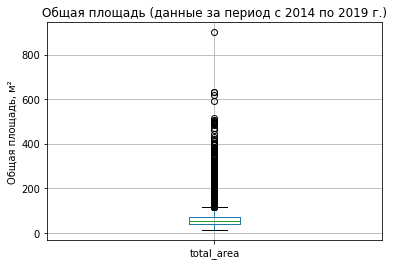

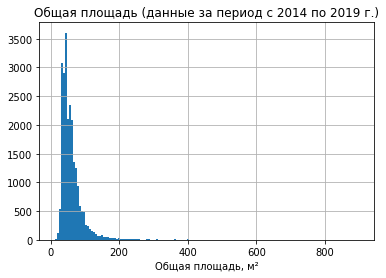

Изучаем столбец "last_price"


count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

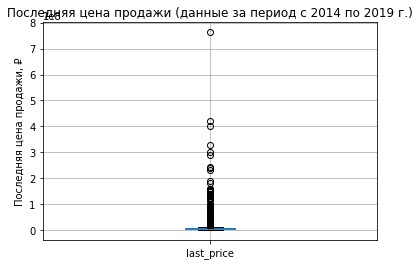

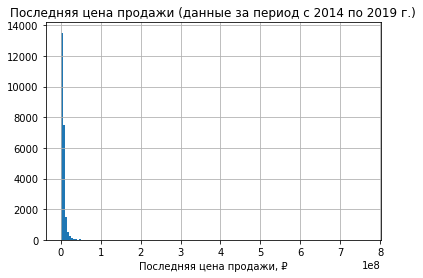

Изучаем столбец "rooms"


count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

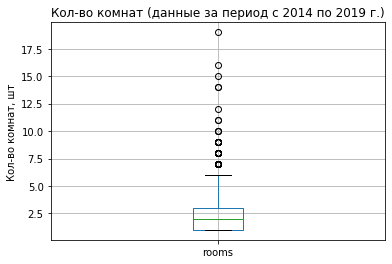

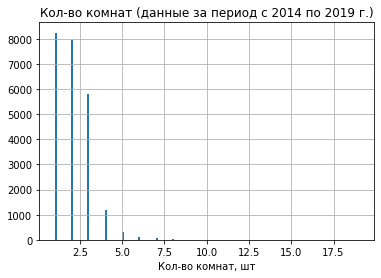

Изучаем столбец "ceiling_height"


count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

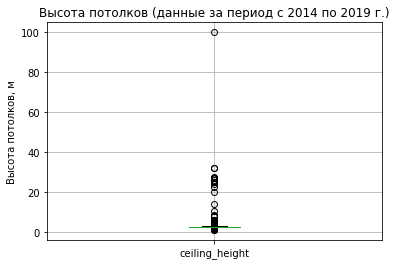

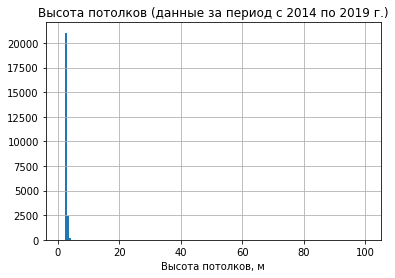

In [20]:
# создаём словарь с названиями столбцов и единицами измерений  
labels = {
    'total_images':['Число фотографий в объявлении','шт'],
    'last_price':['Последняя цена продажи','₽'],
    'total_area':['Общая площадь','м²'],
    'first_day_exposition':['Дата публикации',''],
    'rooms':['Кол-во комнат','шт'],
    'ceiling_height':['Высота потолков','м'],
    'floors_total':['Этажность дома','эт'],
    'living_area':['Жилая площадь','м²'],
    'floor':['Этаж','эт'],
    'is_apartment':['Апартаменты (Да/Нет)',''],
    'studio':['Квартира-студия (Да/Нет)',],
    'open_plan':['Свободная планировка (Да/Нет)',],
    'kitchen_area':['Площадь кухни','м²'],
    'balcony':['Число балконов','шт'],
    'locality_name':['Название населённого пункта',''],
    'airports_nearest':['Расстояние до ближайшего аэропорта','м'],
    'cityCenters_nearest':['Расстояние до центра города','м'],
    'parks_around3000':['Кол-во парков в радиусе 3 км','м'],
    'parks_nearest':['Расстояние до ближайшего парка','м'],
    'ponds_around3000':['Кол-во водоёмов в радиусе 3 км','м'],
    'ponds_nearest':['Расстояние до ближайшего водоёма','м'],
    'days_exposition':['Длительность размещения объявления','дней'],
    'fde_wday_index':['День недели',''],
    'fde_month_index':['Месяц',''],
    'fde_year':['Год','']}

# запишем период отображаемых данных
data_period = ' (данные за период с {} по {} г.)'.format(data['fde_year'].min(), data['fde_year'].max())

# слегка автоматизируем выполнение задания - в цикле выведем для каждого интересующего столбца следующую информацию:
# результат метода describe(), диаграмму размаха и гистограмму
def examine_data(dset, dcolumn, dbins):
    print(f'Изучаем столбец "{dcolumn}"')
    display(dset[dcolumn].describe())
    title=labels[dcolumn][0]+data_period
    ax=dset.boxplot(column=dcolumn)
    ax.set_title(title)
    ax.set_ylabel(labels[dcolumn][0]+', '+labels[dcolumn][1])
    plt.show()
    ax=dset[dcolumn].hist(bins=dbins, grid=True, range=(dset[dcolumn].min(), dset[dcolumn].max()))
    ax.set_title(title)
    ax.set_xlabel(labels[dcolumn][0]+', '+labels[dcolumn][1])
    plt.show()
    

for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    examine_data(data, i, 150)

Итак, что мы увидели в результате изучения этих параметров:

- Площадь: основная часть квартир имеет общую площадь менее 60 м<sup>2</sup>, после этого идёт резкое снижение площадей и где-то после 200 м<sup>2</sup> гистограмма сливается с осью. В целом это вполне соответствует действительности.
- Цена: из-за наличия значительных выбросов гистограмма и диаграмма размаха имеют очень неудобный масштаб, но по результатам вывода функции `describe()` мы можем сказать, что основная часть квартир имеют стоимость до 6,8 миллионов рублей.
- Число комнат: основная часть объявлений имеют от 1 до 6 комнат. В среднем, количество комнат равно двум, что совпадает с медианным значением. Однокомнатных квартир чуть больше, чем двухкомнатных. Трёхкомнатные квартиры уже значительно реже выставляются на продажу - число таких объявлений на 25% ниже, чем двухкомнатных. Четырёхкомантных квартир уже почти в 8 раз меньше, чем двухкомнатных. Далее, с увеличением числа комнат число объявлений снижается практически по экспоненте, и после 8 комнат уже гистограмма практически сливается с нулём.
- Высота потолков: основная часть квартир имеет высоту потолков до 2,7 м - это очень похоже на реальные цифры. Q3+1.5IQR для данного параметра будет равно 2,9 м, что также выглядит вполне правдоподобным значением. Всё, что выше, можно считать выбросами, полученными в результате либо человеческого фактора, либо технических ошибок

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

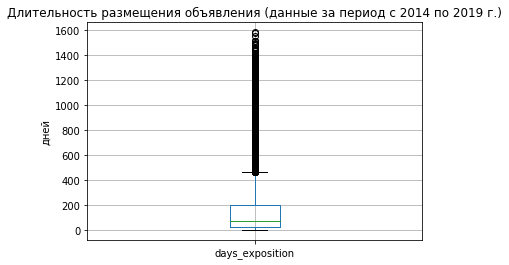

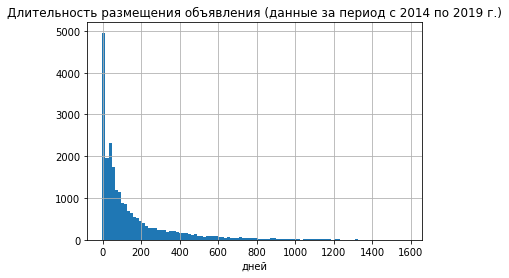

Среднее значение времени продажи: 156 дней
Медианное значение времени продажи: 74 дней


In [21]:
# изучим голые цифры
display(data['days_exposition'].describe())

# построим диаграмму размаха
ax=data.boxplot(column='days_exposition')
ax.set_title(labels['days_exposition'][0]+data_period)
ax.set_ylabel(labels['days_exposition'][1])
plt.show()

# построим гистограмму
ax=data['days_exposition'].hist(bins=100, range=(data['days_exposition'].min(), data['days_exposition'].max()))
ax.set_title(labels['days_exposition'][0]+data_period)
ax.set_xlabel(labels['days_exposition'][1])
plt.show()

# рассчитаем среднее и медиану
mean_days_exposition = round(data['days_exposition'].mean())
median_days_exposition = round(data['days_exposition'].median())

# выведем на экран полученные значения
print(f'Среднее значение времени продажи: {mean_days_exposition} дней')
print(f'Медианное значение времени продажи: {median_days_exposition} дней')

Ответим на поставленные перед нами вопросы:

- Сколько обычно занимает продажа? Основываясь на диаграмме размаха, можно сказать, что обычно продажа занимает от 22 до 199 дней.
- Когда можно считать, что продажи прошли очень быстро? Если время продажи составило менее 22 дней.
- Когда можно считать, что продажа шла необычно долго? Если время продажи составило более 199 дней.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

Сначала определимся со списком столбцов, в которым будет проводить удаление редких и выбивающихся значений. В основном, это будут те столбцы, в которых мы обнаружили аномалии изначально, при знакомстве с данными:
- `last_price`
- `total_area`
- `rooms`
- `ceiling_height`
- `floors_total`
- `living_area`
- `kitchen_area`

Для каждого из столбцов посчитаем значения Q1 - 1.5 * IQR и Q3 + 1.5 * IQR. После этого отфильтруем значения датасета, чтобы они находились в данном диапазоне и запишем отфильтрованные данные в новый датасет

In [22]:
# создадим словарь для левой и правой границы по каждому столбцу
margins = {'last_price':[],
           'total_area':[],
           'rooms':[],
           'ceiling_height':[],
           'floors_total':[],
           'living_area':[],
           'kitchen_area':[]}

# рассчитаем значения границ для каждого столбца
for i in margins.keys():
    q1 = data[i].describe()[4]
    q3 = data[i].describe()[6]
    iqr = q3 - q1
    l_margin = round(q1 - 1.5 * iqr, 2)
    r_margin = round(q3 + 1.5 * iqr, 2)
    margins[i].append(l_margin)
    margins[i].append(r_margin)

# копируем данные в новый датасет
data_filtered = data

# фильтруем в цикле
for i in margins.keys():
    data_filtered = data_filtered[(margins[i][0] <= data_filtered[i]) & (data_filtered[i] <= margins[i][1])]

# смотрим на то, как изменился датасет
display(data_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18522 entries, 1 to 23698
Data columns (total 31 columns):
total_images            18522 non-null int64
last_price              18522 non-null float64
total_area              18522 non-null float64
first_day_exposition    18522 non-null datetime64[ns]
rooms                   18522 non-null int64
ceiling_height          18522 non-null float64
floors_total            18522 non-null uint8
living_area             18522 non-null float64
floor                   18522 non-null int64
is_apartment            18522 non-null bool
studio                  18522 non-null bool
open_plan               18522 non-null bool
kitchen_area            18522 non-null float64
balcony                 18522 non-null uint8
locality_name           18522 non-null object
airports_nearest        18522 non-null int32
cityCenters_nearest     18522 non-null int32
parks_around3000        18522 non-null int8
parks_nearest           18522 non-null int16
ponds_around3000    

None

Итак, после того, как мы убрали редкие и выбивающиеся значения, мы получили 18563 записи в новом датасете, что составляет 78,3 % от изначального количества записей. С учётом того, что ушла 1/5 всех записей, нужно взглянуть на графики по новым данным:

Изучаем столбец "last_price"


count    1.852200e+04
mean     4.536233e+06
std      2.007156e+06
min      4.300000e+05
25%      3.200000e+06
50%      4.200000e+06
75%      5.500000e+06
max      1.190000e+07
Name: last_price, dtype: float64

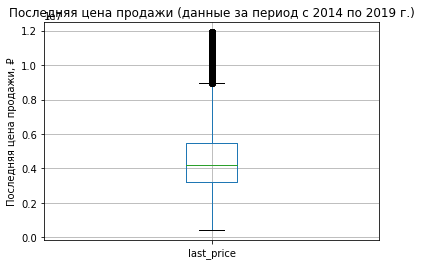

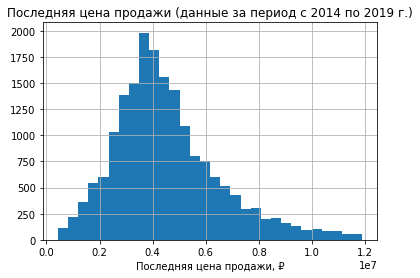

Изучаем столбец "total_area"


count    18522.000000
mean        50.561723
std         16.599058
min         12.000000
25%         37.800000
50%         46.185000
75%         60.300000
max        114.300000
Name: total_area, dtype: float64

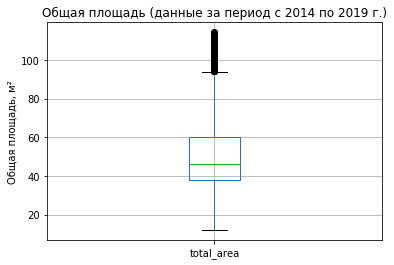

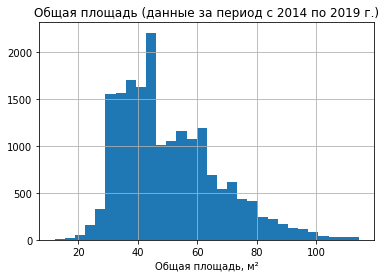

Изучаем столбец "rooms"


count    18522.000000
mean         1.863568
std          0.852499
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

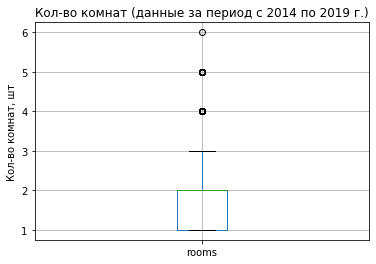

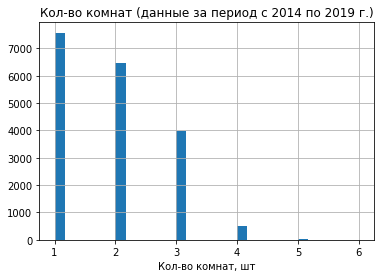

Изучаем столбец "ceiling_height"


count    18522.000000
mean         2.626557
std          0.081577
min          2.450000
25%          2.550000
50%          2.650000
75%          2.650000
max          2.850000
Name: ceiling_height, dtype: float64

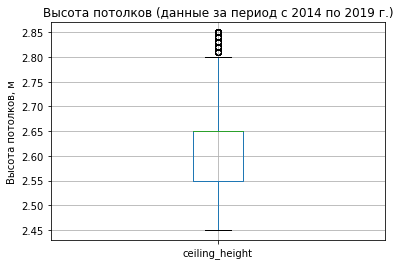

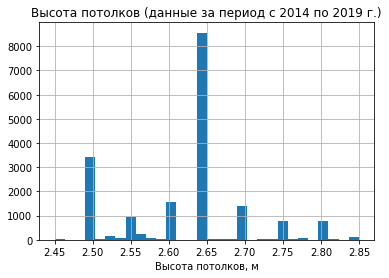

Изучаем столбец "floors_total"


count    18522.000000
mean        11.128496
std          6.585764
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

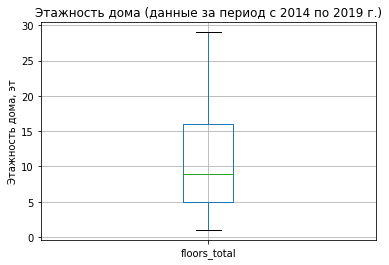

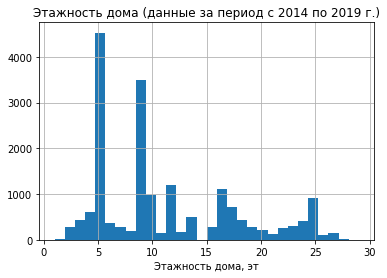

Изучаем столбец "living_area"


count    18522.000000
mean        28.882051
std         11.903062
min          2.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         77.000000
Name: living_area, dtype: float64

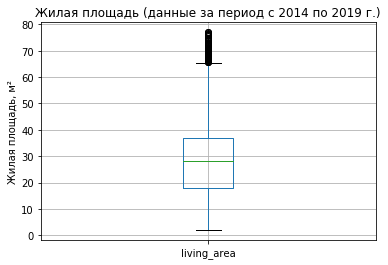

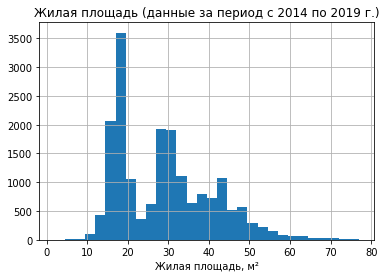

Изучаем столбец "kitchen_area"


count    18522.000000
mean         9.545366
std          3.490870
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         21.700000
Name: kitchen_area, dtype: float64

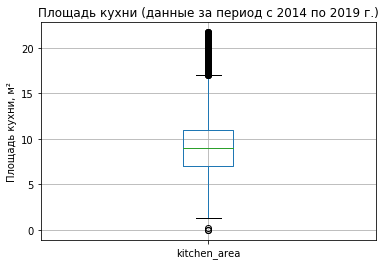

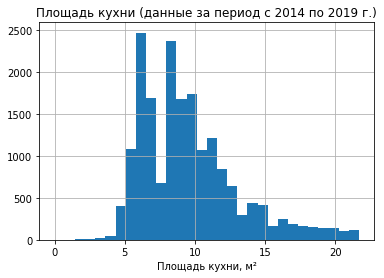

In [23]:
# выводим графики
for i in margins.keys():
    examine_data(data_filtered, i, 30)

Посмотрим на то, как изменились данные:

`last_price` - распределение стоимости квартиры стало близко по форме к нормальному распределению с ярко выраженным пиком в районе 4 миллионов рублей
`total_area` - форма распределения осталась в принципе той же - с хвостом влево, но зато мы смогли уточнить самые популярные значения - имеется в целом две крупные группы площадей - примерно от 30 до 45 м<sup>2</sup> и от 45 до 60 м<sup>2</sup>
`rooms` - мы подтвердили предыдущие выводы. Наибольшей популярностью пользуются 1 и 2 комнатные квартиры, причём 1-комнатные чуть больше (примерно на 15%), затем с большим отрывом 3-комнатные, далее совсем немного объявлений с 4-мя комнатами, и незначительное количество 5 и 6 комнатных квартир
`ceiling_height` - раньше мы практически ничего не знали об этом столбце из-за выбросов, теперь мы можем сказать, что этот параметра имеет два самых распространённых значения: это 2,65 м и 2,5. Это вполне совпадает с реальностью - 2,5 м это типовая высота потолков в домах "хрущёвках", а 2,65 м - в "брежневках" и домах 90-го проекта
`floors_total` - ещё один привет из реальности. Два выдающихся пика: 5 и 9 этажей, опять же привет от "хрущёвок" и "брежневок"
`living_area` - два пика: примерно от 15 до 20 м<sup>2</sup> и от 28 до 35 м<sup>2</sup>
`kitchen_area` - два пика: примерно от 5 до 7 м<sup>2</sup> и от 8 до 10 м<sup>2</sup>. И снова метражи самых популярных планировок.

Главная особенность, которую мы увидели - это наличие двух пиков на гистограммах общей площади, высоты потолков, этажности, жилой площади и площади кухни. Как мы и писали ранее, это объясняется наличием двух наиболее популярных типовых застроек.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года

Для сравнения влияния разных факторов на один параметр нам необходимо будет сделать следующее - построить диаграмму рассеяния и посчитать коэффициент корреляции Пирсона. Для удобства напишем функцию, в теле которой будем выполнять описанные действия и запустим её выполнение в цикле по всем интересующим нас параметрам.

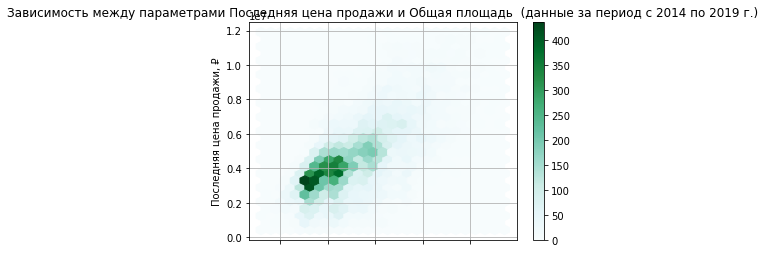

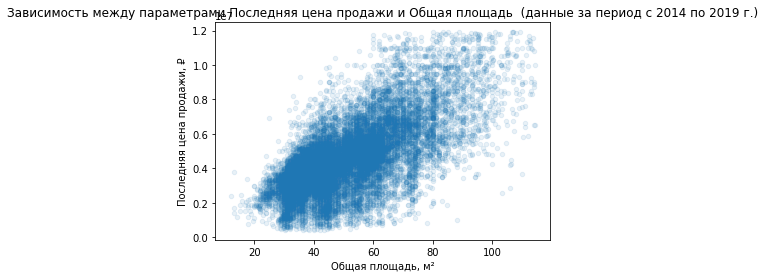

Коэффициент корелляции для цены и столбца total_area составляет 0.68


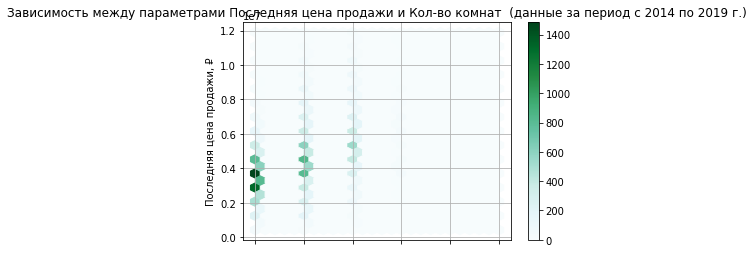

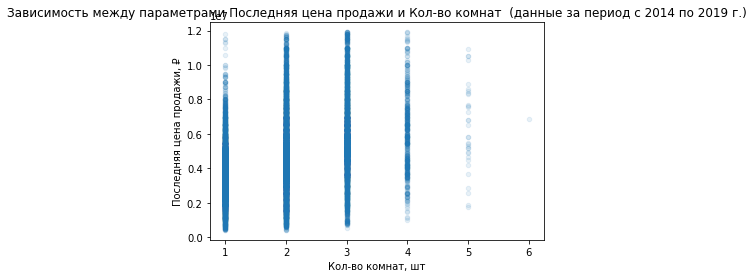

Коэффициент корелляции для цены и столбца rooms составляет 0.42


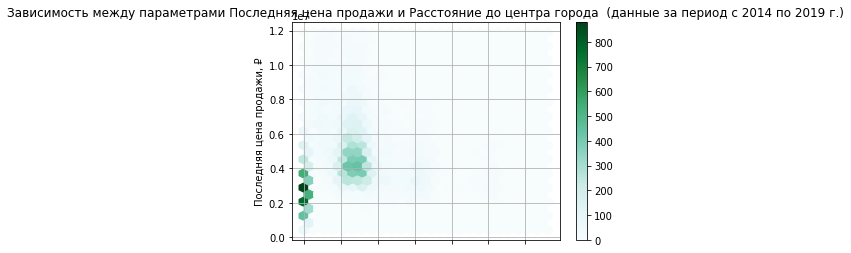

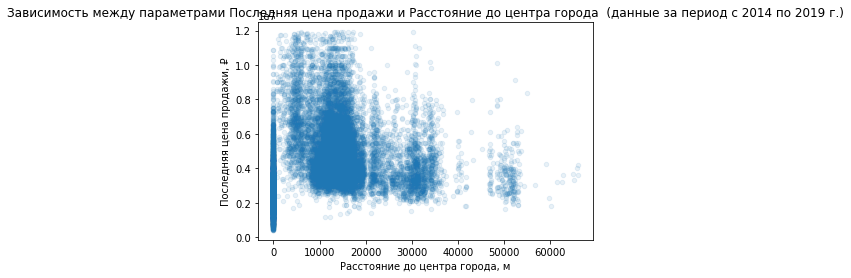

Коэффициент корелляции для цены и столбца cityCenters_nearest составляет 0.17


In [24]:
# пишем функцию
def evaluate_influence(dset, dcolumn, dgrid):
    ax=dset.plot(x=dcolumn, y='last_price', kind='hexbin', gridsize=dgrid, grid=True)
    ax.set_ylabel(labels['last_price'][0]+', '+labels['last_price'][1])
    ax.set_xlabel(labels[dcolumn][0]+', '+labels[dcolumn][1])
    ax.set_title('Зависимость между параметрами {} и {} '.format(labels['last_price'][0], labels[dcolumn][0])+data_period)
    plt.show()
    ax=dset.plot(x=dcolumn, y='last_price', kind='scatter', alpha=0.1)
    ax.set_ylabel(labels['last_price'][0]+', '+labels['last_price'][1])
    ax.set_xlabel(labels[dcolumn][0]+', '+labels[dcolumn][1])
    ax.set_title('Зависимость между параметрами {} и {} '.format(labels['last_price'][0], labels[dcolumn][0])+data_period)
    plt.show()
    corr=round(dset['last_price'].corr(dset[dcolumn]),2)
    print(f'Коэффициент корелляции для цены и столбца {dcolumn} составляет {corr}')

for i in ['total_area', 'rooms', 'cityCenters_nearest']:
    evaluate_influence(data_filtered, i, 25)

Как мы видим из графиков и расчета коэффициентов корреляции, меньше всего на стоимость жилья влияет расстояние до центра города. Наибольшее влияние оказывает общая площадь. Зависимость стоимости жилья от количества комнат в целом есть, но выражена слабо.

Изучим зависимость цены от этажа. Так как мы не присваиваили цифровых индексов для этой категории, вызвать нашу функцию для просмотра связи между этим параметром и ценой мы не можем. ~~Для изучения связи мы сгруппируем данные по параметру `floor_type` и построим гистограммы.~~ Для изучения связи построим гистограммы для каждого значения столбца `floor_type` в цикле.

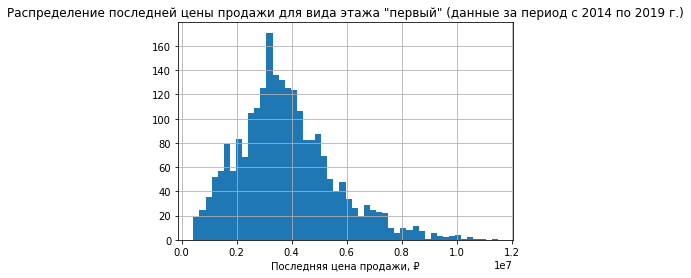

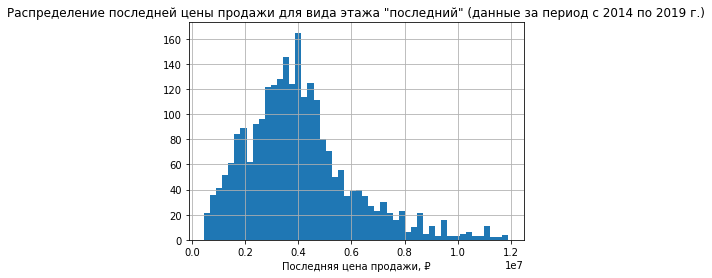

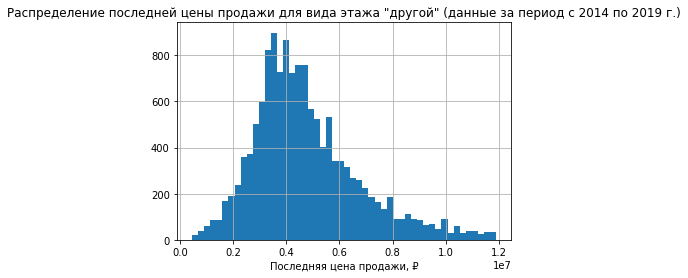

In [25]:
for i in ['первый', 'последний', 'другой']:
    ax=data_filtered.query('floor_type == @i')['last_price'].hist(bins=50)
    ax.set_title(f'Распределение последней цены продажи для вида этажа "{i}"'+data_period)
    ax.set_xlabel(labels['last_price'][0]+', '+labels['last_price'][1])
    plt.show()

В целом, можно сказать об отсутствии зависимости между этажностью и стоимостью жилья. Мы можем лишь сказать, что первый и последний этажи пользуются меньшей популярностью - количество объявлений по ним суммарно почти в 2 раза меньше, чем объявлений с типом этажа "другой". Такой вывод мы можем сделать потому, что наши гистаграммы показывают практически идентичное распределение. При наличии зависимости у более дорогих этажей гистограмма имела бы длинный хвост слева.

Так как параметры день недели, месяц и год имеют числовое представление, мы можем вызвать нашу функцию для исследования влияния:

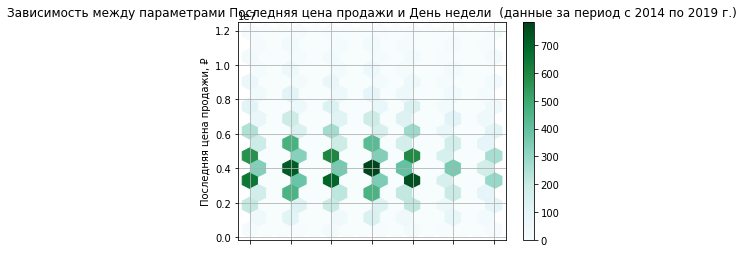

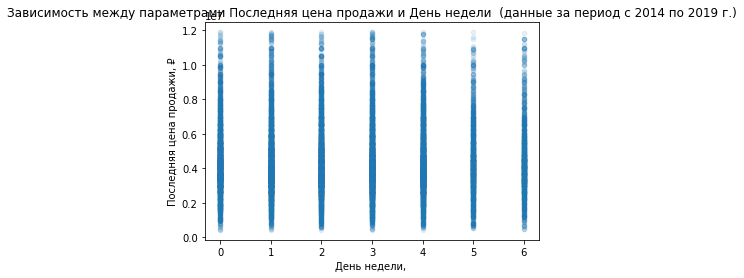

Коэффициент корелляции для цены и столбца fde_wday_index составляет -0.01


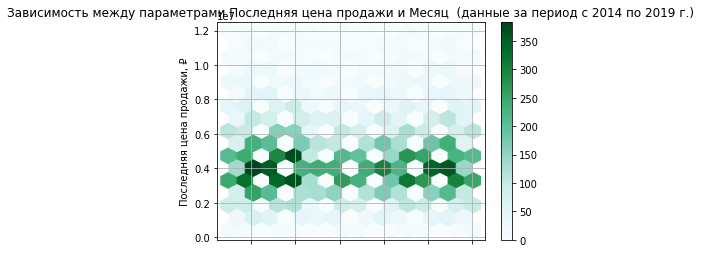

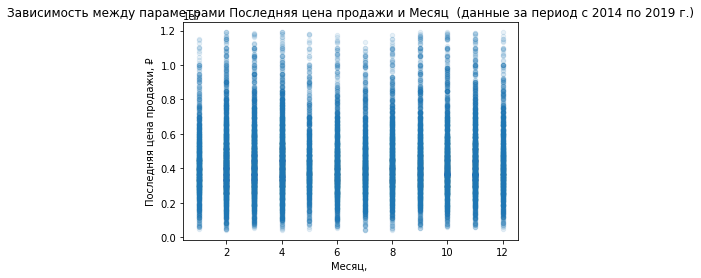

Коэффициент корелляции для цены и столбца fde_month_index составляет 0.01


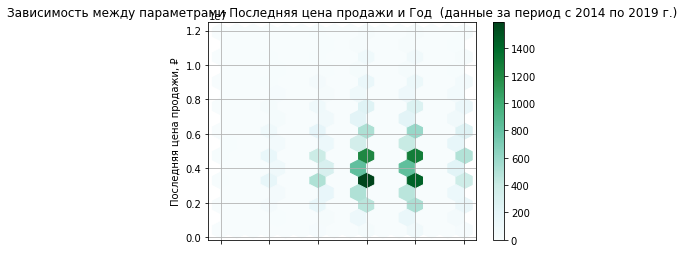

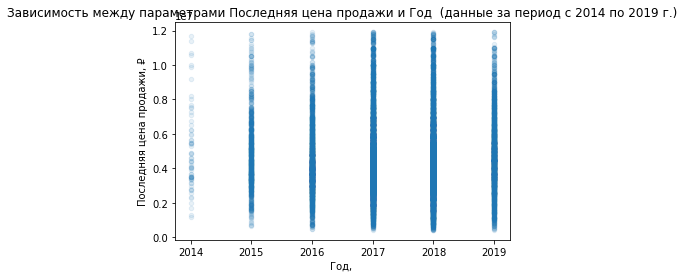

Коэффициент корелляции для цены и столбца fde_year составляет 0.01


In [26]:
for i in ['fde_wday_index', 'fde_month_index', 'fde_year']:
    evaluate_influence(data_filtered, i, 15)

Вполне ожидаемая картина - цена продажи не имеет прямой зависимости от дня недели, месяца или года.

Подводя итог по этой задаче, можно сделать следующие выводы:
- больше всего на стоимость жилья влияет общая площадь. Логика этой зависимости неоспорима: больше метров - больше рублей
- влияние числа комнат на стоимость жилья присутствует, но однозначно описать его трудно. Оно как бы есть, но и как бы нет. Скорее всего это связано с очень ограниченным количеством вариантов данного параметра. Или с тем, что сейчас покупателям важнее общая площадь, чем количество комнат - при грамотном подходе число комнат можно на законных основаниях изменить как в большую, так и в меньшую сторону
- расстояние от центра показало довольно неожиданные результаты в данном сравнении - слухи о его влиянии сильно преувеличены. Возможно это потому, что в данных есть объявления и из маленьких городов, в которых и центр-то выделить сложно
- остальные параметры (тип этажа, день, месяц и год подачи объявления) показали околонулевую корреляцию - то есть либо не влияют на стоимость вообще, либо эта зависимость имеет сложный, нелинейный характер.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'

In [27]:
# создадим сводную таблицу с интересующими нас данными
top_10 = data_filtered.pivot_table(index='locality_name', aggfunc={'total_images':'count', 'last_price':'median', 'rub_per_sqm':'mean'}).sort_values(by='total_images', ascending=False).head(10)

# выведем на экран
display(top_10)

,last_price,rub_per_sqm,total_images
locality_name,,,
Санкт-Петербург,4850000.0,104460.155288,11457
посёлок Мурино,3352500.0,86106.317146,494
посёлок Шушары,3900000.0,79007.930706,411
Всеволожск,3380000.0,67086.482975,353
Колпино,3500000.0,75357.523398,309
посёлок Парголово,4050000.0,90730.671699,306
Гатчина,3000000.0,68326.232975,279
Пушкин,4700000.0,99467.611486,276
деревня Кудрово,3700000.0,93161.239590,268


Топ-1 по числу объявлений, конечно же - Санкт-Петербург. На 10 месте нашего топа - Выборг. Самое дорогое жильё - опять же в Санкт-Петербурге (как по медианной стоимости, так и по средней стоимости квадратного метра). Самое недорогое жильё - в Выборге (также по обоим параметрам)

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона

Text(0, 0.5, 'Средняя стоимость 1 м², ₽')

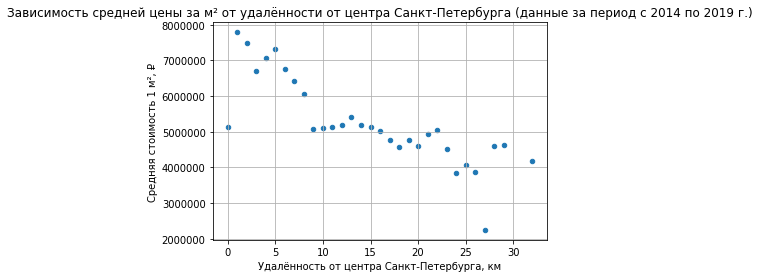

In [28]:
# сохраняем квартиры из Санкт-Петербурга в новый датасет
spb_flats = data_filtered.query('locality_name == "Санкт-Петербург"')

# считаем удалённость от центра в километрах
spb_flats['cityCenters_km'] = round(spb_flats['cityCenters_nearest'] / 1000)

# считаем среднюю цену для каждого километра
spb_flats_pivoted = spb_flats.pivot_table(index='cityCenters_km', aggfunc={'last_price':'mean'})
spb_flats_pivoted['cityCenters_km'] = list(sorted(spb_flats['cityCenters_km'].unique()))

# выводим график
ax=spb_flats_pivoted.plot(x='cityCenters_km', y='last_price', kind='scatter', grid=True)
ax.set_title('Зависимость средней цены за м² от удалённости от центра Санкт-Петербурга'+data_period)
ax.set_xlabel('Удалённость от центра Санкт-Петербурга, км')
ax.set_ylabel('Средняя стоимость 1 м², ₽')

Как мы видим из графика, средняя цена резко изменяется на расстоянии 9 км от центра, таким образом можно сделать вывод, что центральная зона в Санкт-Петербурге ограничена 9 км.

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Изучаем столбец "total_area"


count    6593.000000
mean       50.502723
std        17.033968
min        12.000000
25%        37.000000
50%        46.300000
75%        60.600000
max       114.300000
Name: total_area, dtype: float64

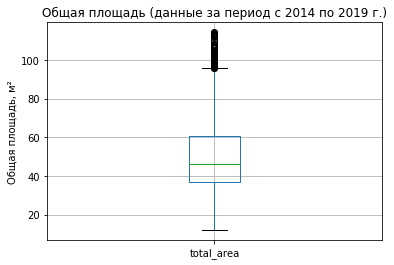

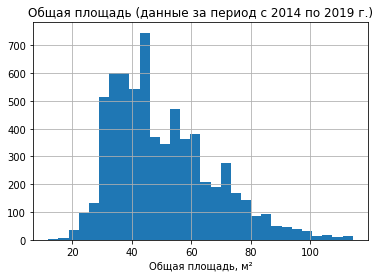

Изучаем столбец "last_price"


count    6.593000e+03
mean     3.844405e+06
std      2.283110e+06
min      4.300000e+05
25%      2.260000e+06
50%      3.233007e+06
75%      4.861000e+06
max      1.190000e+07
Name: last_price, dtype: float64

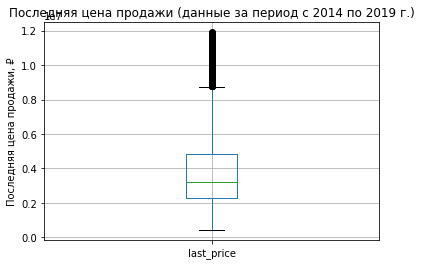

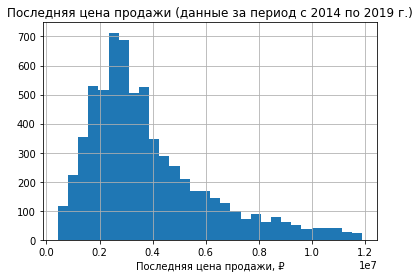

Изучаем столбец "rooms"


count    6593.000000
mean        1.858941
std         0.841218
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: rooms, dtype: float64

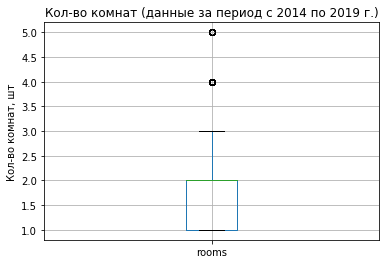

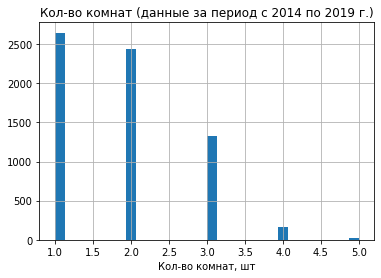

Изучаем столбец "ceiling_height"


count    6593.000000
mean        2.631882
std         0.079170
min         2.450000
25%         2.600000
50%         2.650000
75%         2.650000
max         2.850000
Name: ceiling_height, dtype: float64

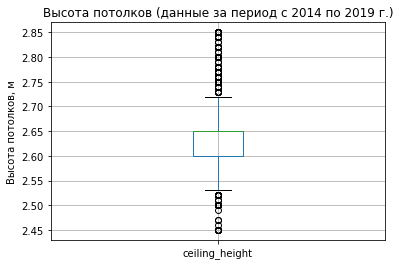

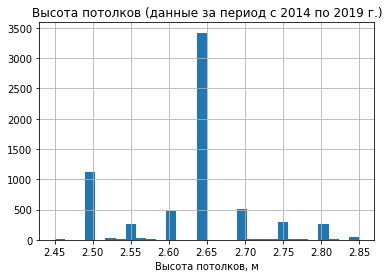

In [29]:
# создаём датасет с квартирами в центре
center_flats = data_filtered.query('cityCenters_nearest <= 9000')

# вызываем функцию в цикле для изучения параметров
for i in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
    examine_data(center_flats, i, 30)

Итак, сравним выводы по квартирам в центре с выводами по всему городу:
`total_area` - распределение практически идентичное
`last_price` - распределение больше не похоже на нормальное, т.к. пик сдвинулся к 3 миллионам рублей и теперь имеет длинный хвост вправо
`rooms` - шестикомнатных квартир больше нет, остальное вполне соответствует с выводами по городу
`ceiling_height` - распределение высоты потолков практически идентично полученному раньше

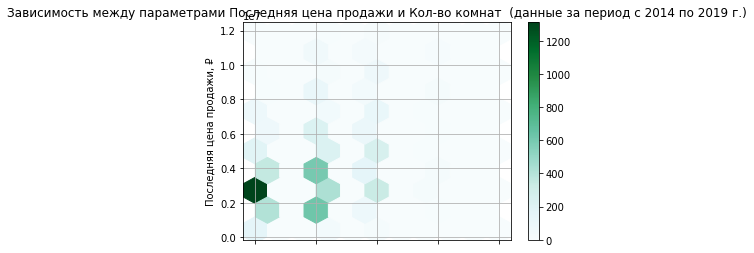

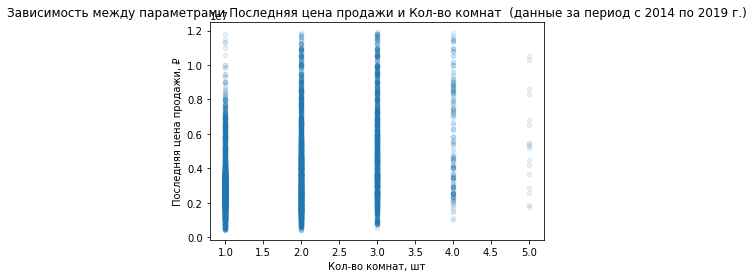

Коэффициент корелляции для цены и столбца rooms составляет 0.34


In [30]:
# изучим влияние числа комнат на стоимость квартир в центре
evaluate_influence(center_flats, 'rooms', 10)

Коэффициент корреляции между стоимостью жилья и количеством комнат в центре меньше, чем в целом по городу на 20%, т.е. в центральной части эта призрачная связь выражена ещё меньше.

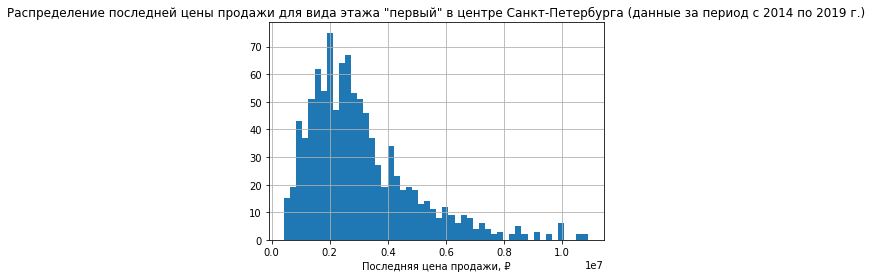

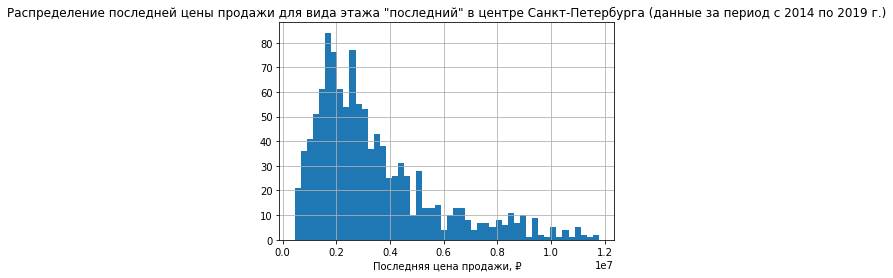

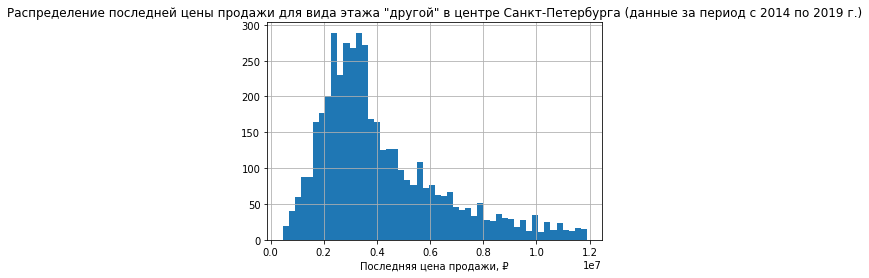

In [31]:
# изучаем влияние типа этажа - первый, последний, другой
for i in ['первый', 'последний', 'другой']:
    ax=center_flats.query('floor_type == @i')['last_price'].hist(bins=50)
    ax.set_title(f'Распределение последней цены продажи для вида этажа "{i}" в центре Санкт-Петербурга'+data_period)
    ax.set_xlabel(labels['last_price'][0]+', '+labels['last_price'][1])
    plt.show()

В данном случае есть небольшие отличия - этажи типа "другой" оцениваются чуть выше - пик распределения цен с таким этажом сдвинут ближе к 4 миллионам, для остальных типов этажей - ближе к двум.

Text(0, 0.5, 'Средняя стоимость 1 м², ₽')

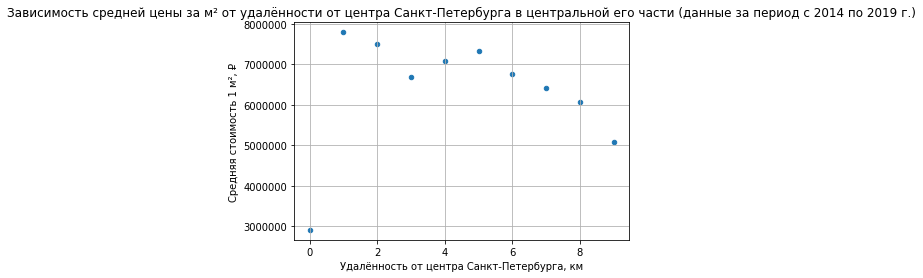

In [32]:
# считаем расстояния до центра в километрах
center_flats['cityCenters_km'] = round(center_flats['cityCenters_nearest'] / 1000)

# считаем среднюю цену для каждого километра
center_flats_pivoted = center_flats.pivot_table(index='cityCenters_km', aggfunc={'last_price':'mean'})
center_flats_pivoted['cityCenters_km'] = list(sorted(center_flats['cityCenters_km'].unique()))

# выводим график
ax=center_flats_pivoted.plot(x='cityCenters_km', y='last_price', kind='scatter', grid=True)
ax.set_title('Зависимость средней цены за м² от удалённости от центра Санкт-Петербурга в центральной его части'+data_period)
ax.set_xlabel('Удалённость от центра Санкт-Петербурга, км')
ax.set_ylabel('Средняя стоимость 1 м², ₽')

Как мы видим, ситуация в центре почти линейная - с ростом расстояния средняя стоимость жилья убывает, и на границе центральной области падает почти на 35% от первоначального значения. Это отличается от общей картины по городу, где в определённом диапазоне сразу после центральной области средняя стоимость практически не изменяется на протяжении 10 км.

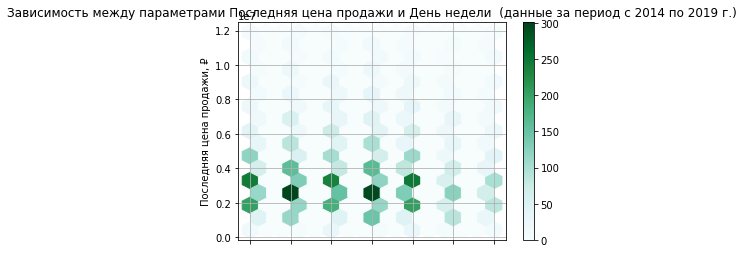

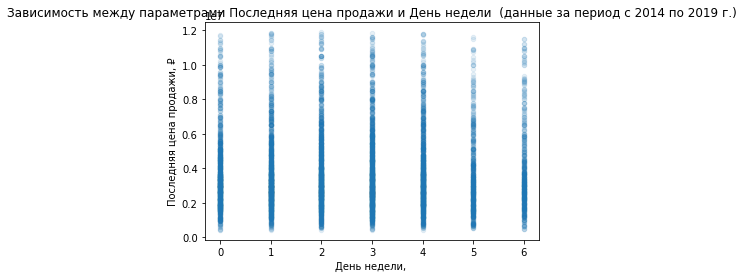

Коэффициент корелляции для цены и столбца fde_wday_index составляет 0.0


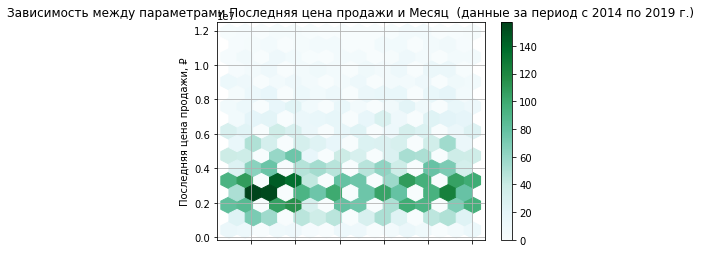

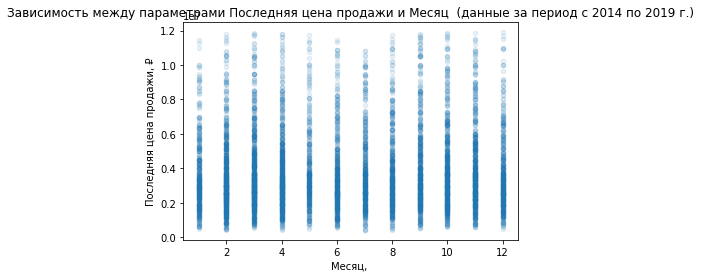

Коэффициент корелляции для цены и столбца fde_month_index составляет 0.04


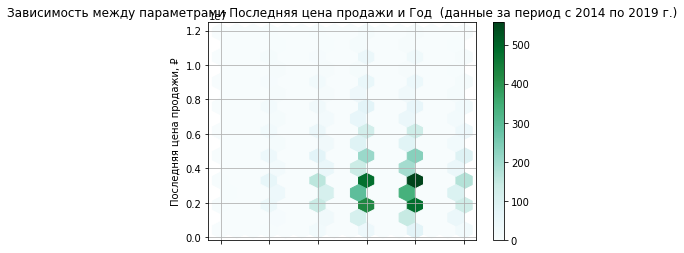

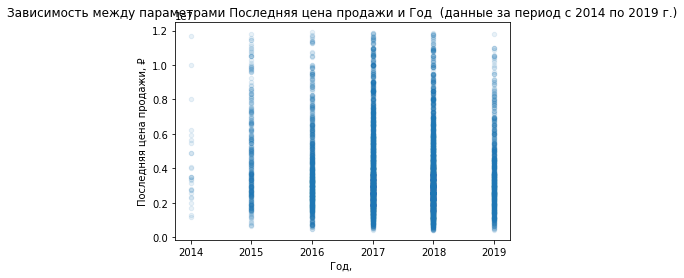

Коэффициент корелляции для цены и столбца fde_year составляет -0.09


In [33]:
# изучим влияние дня размещения на стоимость квартир в центре
for i in ['fde_wday_index', 'fde_month_index', 'fde_year']:
    evaluate_influence(center_flats, i, 15)

По сравнению с общими выводами по городу коэффициенты корреляции между стоимостью жилья и такими параметрами как месяц и год размещения имеют чуть большее значение, но в любом случае они близки к нулю, так что, как и в прошлый раз, зависимость либо отсутствует вовсе, либо её характер не является линейным.

### Вывод

В данном разделе мы провели исследовательский анализ данных. Мы выполнили следующие задачи:
- Изучили основные параметры, характеризующие квартиру. Поняли, что наличие выбросов не позволяет нам адекватно оценивать графическое представление этих данных
- Изучили время продажи квартиры и пришли к выводу, что обычно квартира продаётся от 22 до 199 дней. Соответственно, продажу менее 22 дней можно назвать быстрой, более 199 - медленной
- Убрали редкие и выбивающиеся значения. При этом обнаружили, что распределения параметров стали более удобными для изучения, а по основным параметрам жилья прослеживаются схожие тенденции
- Изучили влияние различных факторов на стоимость жилья и пришли к выводу, что единственным фактором, про который можно с уверенностью говорить о его влиянии на стоимость жилья, является общая площадь
- Выбрали топ-10 населённых пунктов по числу объявлений. Посчитали для них среднюю стоимость квадратного метра, медианную стоимость жилья, а также количество объявлений. Определили, что по всем этим параметром лидером нашего чарта является Санкт-Петербург, а замыкающим - Выборг
- Построили график зависимости средней стоимости жилья от удалённости от центра и выяснили, что условный центр Санкт-Петербурга имеет радиус 9 км
- Изучили сегмент квартир в центральной зоне. Выяснили, что основные зависимости и выводы, сделанные в целом по городу, применимы и к его центру, за исключением того, что жители центра чуть дороже оценивают этажи, не являющиеся первым и последним

## Общий вывод

В результате проведённого исследования мы выяснили следующее:

- В предоставленных для анализа данных содержалось большое количество пропусков, связанных с работой технической части сервиса. Повторим наши рекомендации:
 - Разобраться с интерфейсом формы подачи объявления (ввести проверку полей на заполнения, указать обязательные для заполнения поля)
 - Разобраться с геосервисом, предоставляющим данные для расстояний до важных объектов инфраструктуры и рекреации - либо алгоритм расчёта неверен, либо присутствует сбой при парсинге этих данных в сервис (на эти данные пришлась большая часть пропусков)
- Стандартное время продажи квартиры составляет от 22 до 199 дней. Всё, что продано за меньший срок - можно считать очень быстрой продажей, всё что продаётся дольше - необычно долгой, по таким объектам нужно принимать меры - снижать цену продажи, переписывать текст объявления, подавать более привлекательные фото
- Самые популярные виды недвижимости в продаже - квартиры "хрущёвского" и "брежневского" фонда
- На стоимость недвижимости больше всего (коэффициент корреляции 0,68) влияет общая площадь квартиры. Количество комнат оказывает слабое влияние (коэффициент корреляции 0,42). Удалённость от центра имеет влияние только в пределах самого центра (в радиусе 9 км), за пределами этого радиуса влияние практически отсутствует
- Стоимость жилья не имеет прямой зависимости от даты размещения объявления (скорее всего зависимость отсутствует вовсе, но нужно провести дополнительное исследование, возмонжно зависимость просто имеет нелинейный характер)
- Из топ-10 городов с наибольшим количеством объявлений, самый популярный - Санкт-Петербург, замыкает список - Выборг. Цены на недвижимость в этом списке также наибольшие в Санкт-Петербурге, а наименьшие - в Выборге
- Для центра Санкт-Петербурга справедливы все те же зависимости, что и в среднем по городу, но еть отличия. В центре характерен больший интерес к квартирам, расположенным не на первом и последних этажах (пиковая стоимость жилья для таких этажей выше почти на 2 миллиона ₽). Также в центре ещё меньше (почти на 20%) выражена зависимость стоимости жилья от количества комнат (коэффициент корреляции 0,34)